# Exploratory Data Analysis Basics

# EDA Definition

<img src="image-20230102-081146.png" alt="drawing" style="width:500px;"/>

## Razones para hacer un EDA

- Organizar y entender las variables

- Establecer relaciones entre las variables

- Encontrar patrones ocultos en los datos

- Ayuda a escoger el modelo correcto para la necesidad correcta

- Tomar decisiones informadas

## Pasos de EDA

<img src="image-20230102-081536.png" alt="drawing" style="width:600px;"/>

## Tipos de Analitica de datos

<img src="image-20230102-082132.png" alt="drawing" style="width:500px;"/>

# Project

## Environment Setup

### Library installation

In [1]:
!pip install --upgrade pip

!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

^C
  Using cached palmerpenguins-0.1.4-py3-none-any.whl (17 kB)
  Using cached numpy-1.23.4-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached pandas-1.5.1-cp311-cp311-win_amd64.whl (10.3 MB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached matplotlib-3.6.0-cp311-cp311-win_amd64.whl (7.2 MB)
  Using cached empiricaldist-0.6.7.tar.gz (11 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached statsmodels-0.13.5-cp311-cp311-win_amd64.whl (9.0 MB)
  Using cached scikit-learn-1.1.2.tar.gz (7.0 MB)
  Installing build dependencies: started


### Library import

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

### Stablish Chart Settings

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Importing Dataset

The dataset chosen for this project is the **palmerpenguins dataset**

The goal of the Palmer Penguins dataset is to replace the highly overused Iris dataset for data exploration & visualization.

The information contains size measurements, clutch observations, and blood isotope ratios for 344 adult foraging Adélie, Chinstrap, and Gentoo penguins observed on islands in the Palmer Archipelago near Palmer Station, Antarctica.

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica Long Term Ecological Research (LTER) Program.



### Raw Data

*This package contains a raw dataset (literally contains the data as it was collected)*

In [4]:
raw_df = palmerpenguins.load_penguins_raw()

raw_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


### processed data

*Dataset containing already processed data*

In [5]:
df = palmerpenguins.load_penguins()

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Using the seaborn dataset

*Seaborn also contains this dataset, let's see it:*

In [6]:
sns.load_dataset("penguins")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Performing EDA

*Now let's answer some questions, remember that the name of our dataframe is stored in **df***

### What are the variables types for this dataset?

******

*You can use pandas attribute dtype to do this:*

In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

- *"object" is usually synonymous of **categorical** variables*
- *"float64" is usually synonymous of **Numerical continuous** variables*
- *"int64" is usually synonymous of **Numerical discrete** variables*

### How many variables of each type is present in the dataset?

******

*The value_counts() attribute can help*

In [8]:
(
    df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

### How many variables and records are in the dataset?


*The .shape() function can help with this*

In [9]:
df.shape

(344, 8)

- *344 rows*
- *8 columns*

*That answers the question*

### Are there null values in the dataset?

- *.isnull() returns boolean values*
- *any() tells you if null values are present in a column*

*See the result below:*



In [10]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### How many null values are there in each column?


*use .sum() to obtain the results*

In [11]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### What is the total amount of null values in the dataset?


*call .sum() again in the previous result*

In [12]:
df.isnull().sum().sum()

19

### What is the null values proportion for each variable?


*let's show it in percentage*

In [13]:
( df.isnull().sum()/(df.shape[0]) )*100

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
year                 0.000000
dtype: float64

*You can actually make a chart to represent this:*

In [14]:
melted = df.isnull().melt()

melted

,variable,value
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2747,year,False
2748,year,False
2749,year,False
2750,year,False


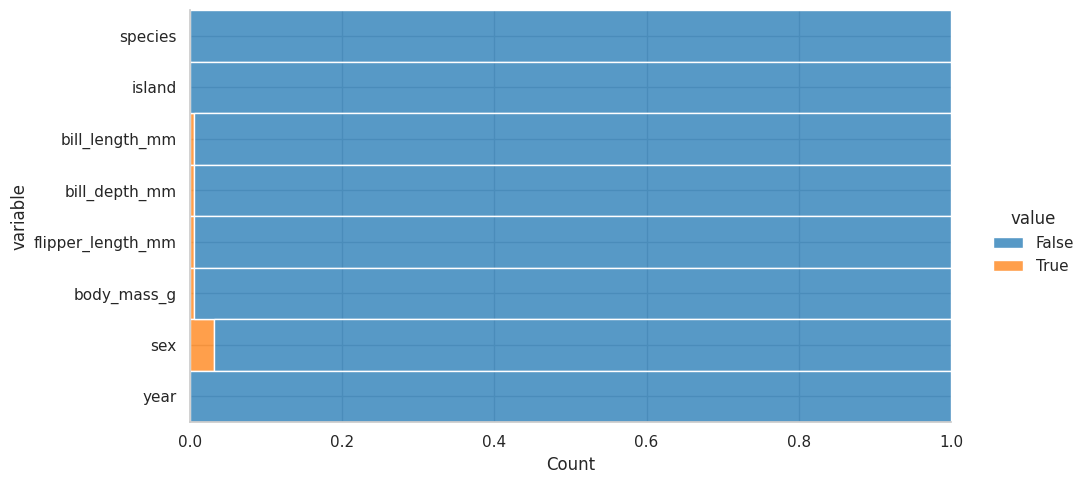

In [15]:
melted.pipe(
    lambda x : sns.displot(data=x, y="variable", hue="value", multiple="fill", aspect=2)
)

*Los valores nulos no llegan ni al 10%*

### What are the records that contain the null values in the dataset? (Visualize)

*First create the dataframe*

In [16]:
nulls = df.isnull().transpose()
nulls

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


*Now the chart*

<AxesSubplot: >

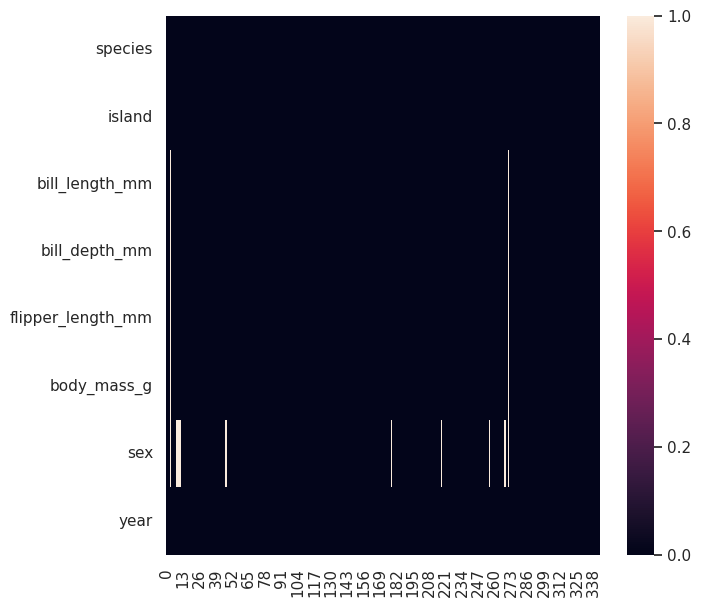

In [17]:
plt.figure(figsize=(7, 7))
nulls.pipe(
    lambda x : sns.heatmap(data=x)
)

# Alternatively, use:
#df.isnull().transpose().pipe(lambda x : sns.heatmap(data=x))

*Here you can evidence:*

- *The missing values (Not corresponding to sex) are associated with only two records*
- *The sex missing values are consistant, we should not worry about that*
- *You might want to delete those two records that contain the vast majority of missing values (Not corresponding to sex)*

### How many records will be lost if we delete all the missing values?

In [18]:
df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


*Note that now you have 333 rows, instead of the original 344*

***THIS COMMAND DOES NOT MODIFY YOUR ORIGINAL DATABASE!!!!***

In [19]:
df.shape

(344, 8)

***DO YOU SEE?***

***SO, LET'S SAVE IT** into another variable ;)*

In [20]:
df_clean = df.dropna()

df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Counts and Proportions

### What measures describe our dataset?

*The function **.describe()** can do this for us, but it will just do it for numerical variables.*

*To include strings use **.describe(include="all")***

In [21]:
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


***What if i want only numerical variables?***

In [22]:
df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


***What if i want only categorical variables?***

In [23]:
df.describe(include=object)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


### BONUS: Transform an object into a category

*See how to transform a column with the data type "object into a category"*

*This allows cool things such as see the proportions*

In [24]:
df.astype({
        "species":"category",       #just insert a dict where key is column name and value is the type
        "island":"category",
        "sex":"category"
    })

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### How to visualize counts?

***Pandas***

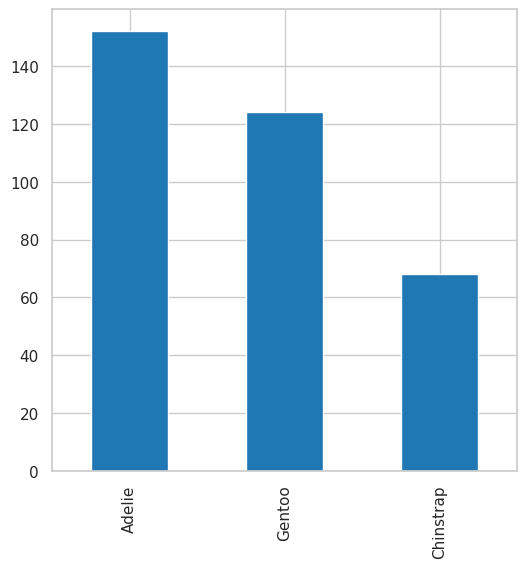

In [25]:
plt.figure(figsize=(6, 6))
df.species.value_counts().plot(kind="bar");

***Seaborn***

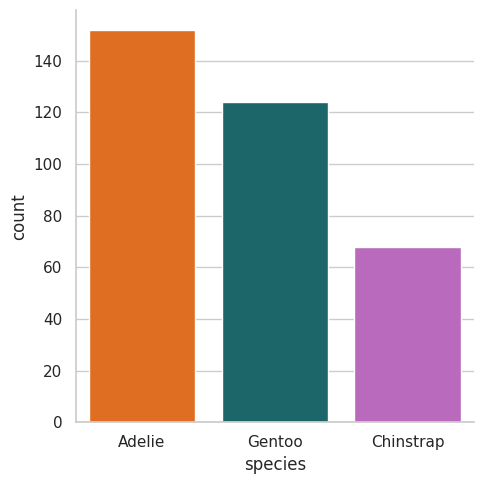

In [26]:
sns.catplot(data=df, x="species", kind="count", palette=penguin_color);

### How to visualize proportions

***Seaborn***

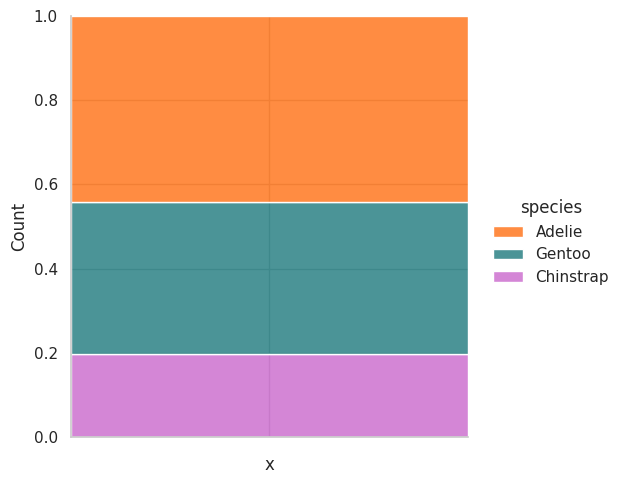

In [27]:
df.add_column("x", "").pipe(
    lambda df: (
        sns.displot(data=df, x="x", hue="species", multiple="fill", palette=penguin_color)
    )
);

## Measures of central tendency

### Mean

***for all the variables***

In [28]:
df.mean()

/tmp/ipykernel_1302/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

*A penguin is around 4 kg LOLLLLLL*

***Only one variable***

In [29]:
df.bill_depth_mm.mean()

17.151169590643274

### Median

In [30]:
df.median()

/tmp/ipykernel_1302/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

### Mode

In [31]:
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


*Works for categorical too*

## Measures of dispersion

### Maximum value for each variable?

In [32]:
df.max(numeric_only=True)           #numeric_only=True excludes the categorical variables(makes sense)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

### Minimum value for each variable?

In [33]:
df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### Range of each variable

In [34]:
df.max(numeric_only=True) - df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### Standart deviation

In [35]:
df.std()

/tmp/ipykernel_1302/3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
year                   0.818356
dtype: float64

### Interquartile range?

*The IQR equals **Q3-Q1**, and it holds the 50% of the data around the mean*

***Q1***

In [36]:
df.quantile(0.25)

/tmp/ipykernel_1302/3656653379.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.25)


bill_length_mm         39.225
bill_depth_mm          15.600
flipper_length_mm     190.000
body_mass_g          3550.000
year                 2007.000
Name: 0.25, dtype: float64

***Q3***

In [37]:
df.quantile(0.75)

/tmp/ipykernel_1302/3799946287.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.75)


bill_length_mm         48.5
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4750.0
year                 2009.0
Name: 0.75, dtype: float64

***IQR***

In [38]:
(
    df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis("variable")
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

/tmp/ipykernel_1302/4097684495.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.5,44.45,39.225,9.275
1,bill_depth_mm,18.7,17.30,15.600,3.100
2,flipper_length_mm,213.0,197.00,190.000,23.000
3,body_mass_g,4750.0,4050.00,3550.000,1200.000
4,year,2009.0,2008.00,2007.000,2.000


## Probabilities

### Probability Mass function 

***Probability for each value***

In [39]:
empiricaldist.Pmf.from_seq(df.flipper_length_mm)

,probs
172.0,0.002924
174.0,0.002924
176.0,0.002924
178.0,0.011696
179.0,0.002924
180.0,0.014620
181.0,0.020468
182.0,0.008772
183.0,0.005848
184.0,0.020468


***Then, if i want to know that is the specific probability of getting a value:***

In [40]:
empiricaldist.Pmf.from_seq(df.flipper_length_mm)(190)

0.06432748538011696

### Empirical Cumulative Distribution Function

This one returns the cumulative probability based on the dataset

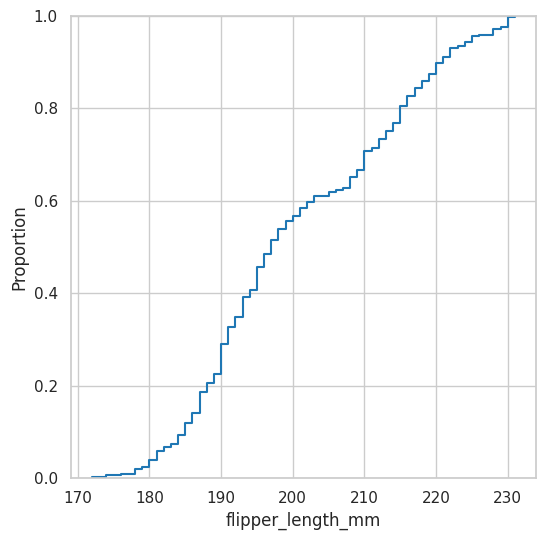

In [41]:
plt.figure(figsize=(6, 6))
sns.ecdfplot(data=df, x="flipper_length_mm");

***Probabilities of getting a penguin with 200 or less flipper_length?***

In [42]:
empiricaldist.Cdf.from_seq(df.flipper_length_mm)(200)

array(0.56725146)

***See the chart below for a better interpretation***

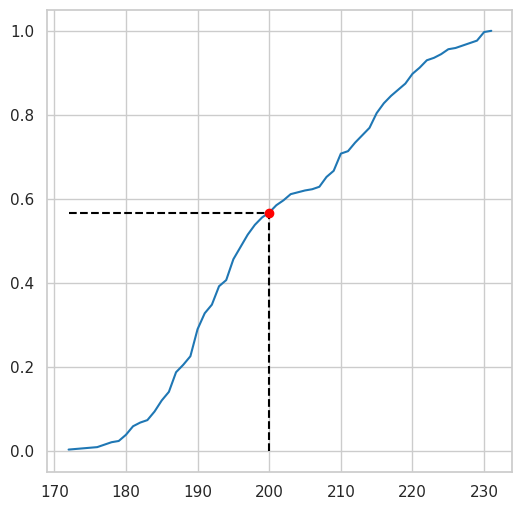

In [43]:
plt.figure(figsize=(6, 6))

empiricaldist.Cdf.from_seq(df.flipper_length_mm).plot()

q=200
p = empiricaldist.Cdf.from_seq(df.flipper_length_mm)(200)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color="black",
    linestyle="dashed"
)

plt.hlines(
    y=p,
    xmin=empiricaldist.Cdf.from_seq(df.flipper_length_mm).qs[0],
    xmax=q,
    color="black",
    linestyle="dashed"
)

plt.plot(q, p, "ro");

## Correlations

### Pairplot

*In this case, please remove the year column, despite being a numeric column, it is not adding value to the correlation analysis*

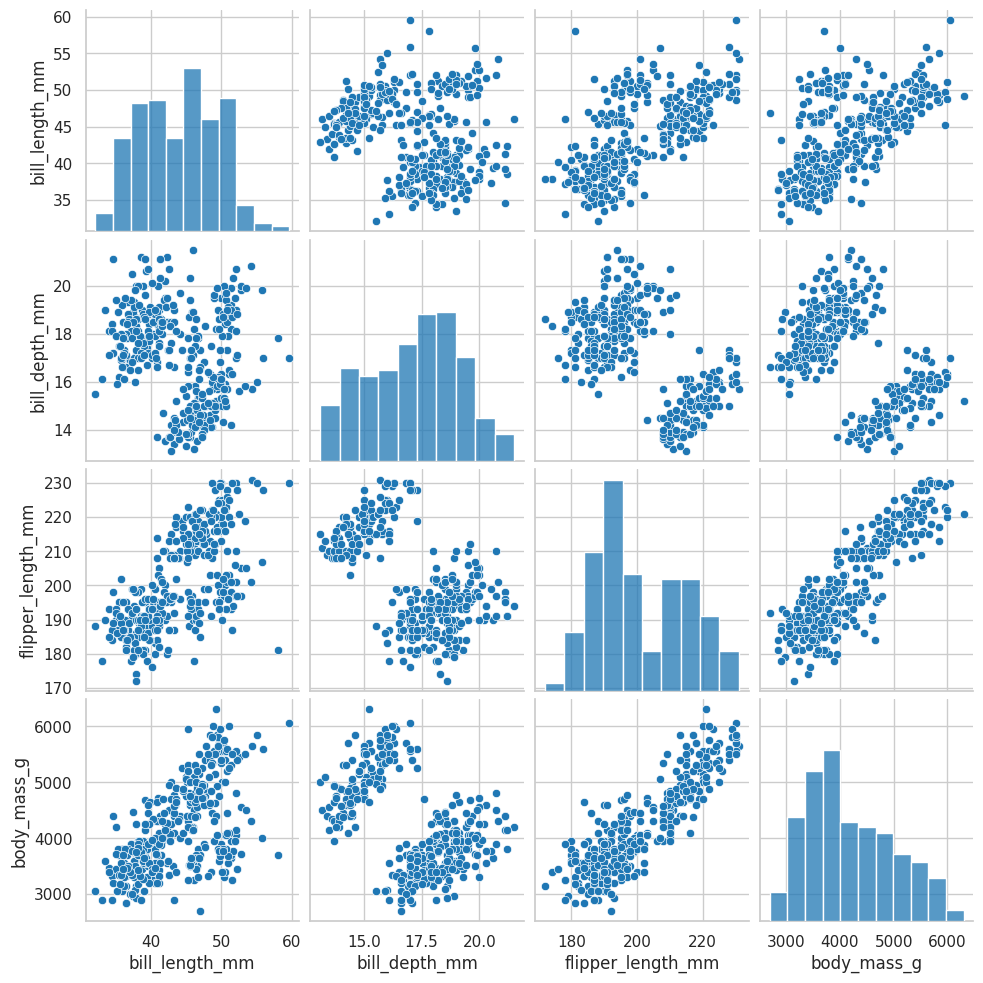

In [44]:
sns.pairplot(data=df.drop(["year"], axis=1));

### Pairplot per specie

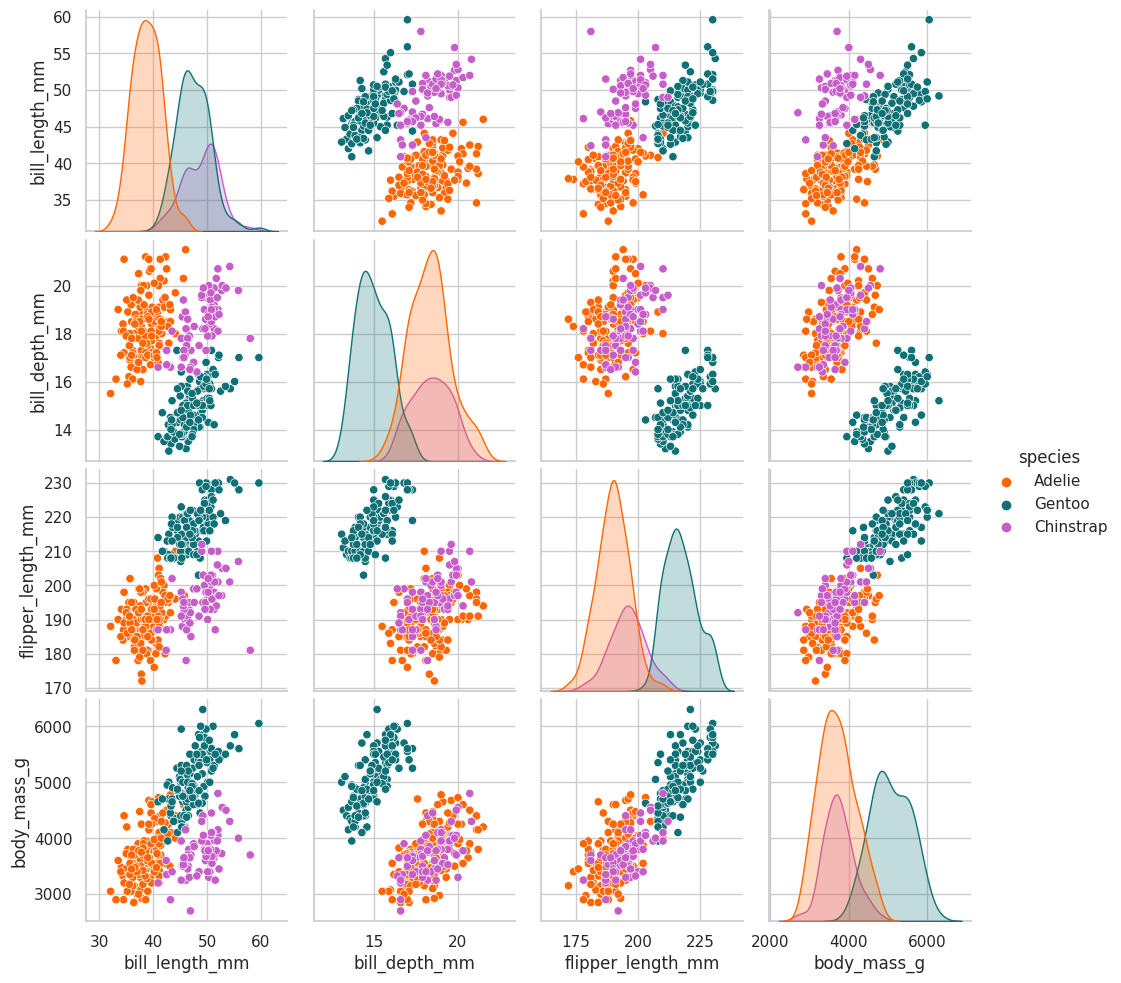

In [45]:
sns.pairplot(data=df.drop(["year"], axis=1), hue="species", palette=penguin_color);

### Swarmplot

*This one can be used to associate a categorical variable with a numerical:*

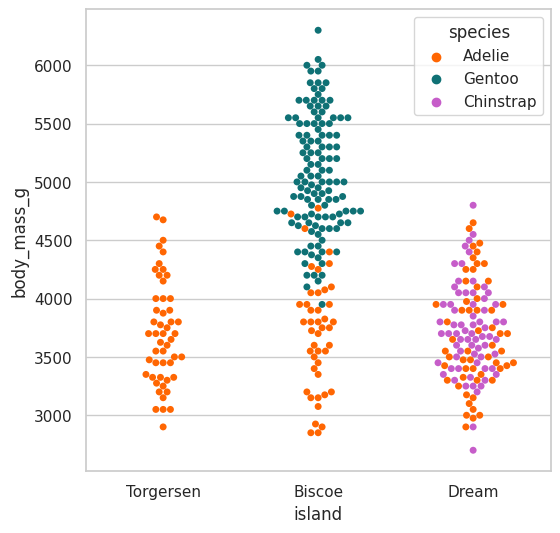

In [46]:
plt.figure(figsize=(6, 6))
sns.swarmplot(
    data=df,
    x="island",
    y="body_mass_g",
    hue="species",
    palette=penguin_color
);

- *There doesn't seem to be a relation among the penguin body mass and the island where it is located*
- *there is a relation among the body mass and the specie*

### Is there a linear correlation among any of our variables?

In [47]:
df.drop(["year"], axis=1).corr()          #first remove the year column and then run

/tmp/ipykernel_1302/2116061803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(["year"], axis=1).corr()          #first remove the year column and then run


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


- *Flipper length and body mass have a 0.8712 correlation coef, high*

*let's visualize that into a matrix*

/tmp/ipykernel_1302/2892716928.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.drop(["year"], axis=1).corr(),


<AxesSubplot: >

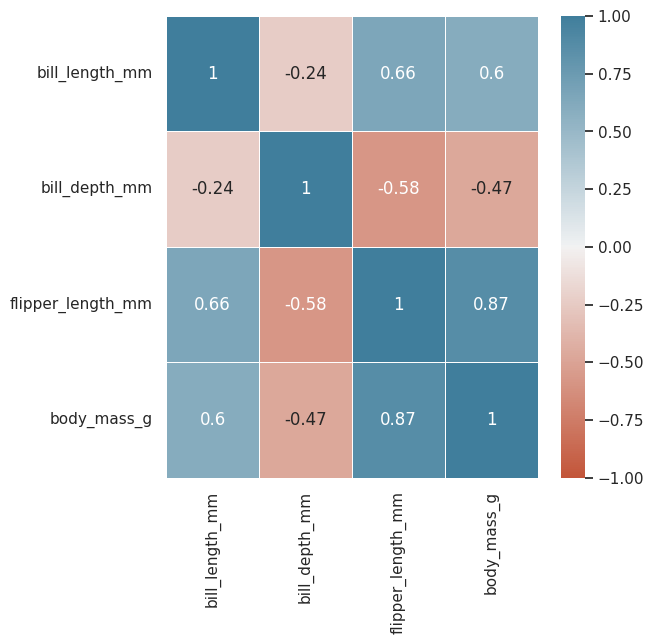

In [48]:
plt.figure(figsize=(6, 6))
sns.heatmap(
    data=df.drop(["year"], axis=1).corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),        #nice color palette
    center=0,                                                 #centering the color legend
    vmin=-1,                                                  #set min corr value to -1
    vmax=1,                                                   #set max corr value to 1
    linewidths=0.5,
    annot=True
)

/tmp/ipykernel_1302/2652653307.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.drop(["year"], axis=1).corr(),


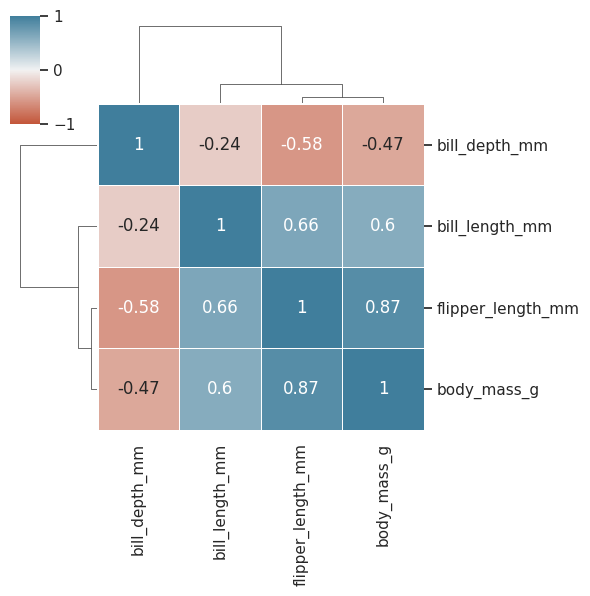

In [49]:
sns.clustermap(
    data=df.drop(["year"], axis=1).corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),        #nice color palette
    center=0,                                                 #centering the color legend
    vmin=-1,                                                  #set min corr value to -1
    vmax=1,                                                   #set max corr value to 1
    linewidths=0.5,
    annot=True,
    figsize=(6,6)
);

### How can i represent a categorical variable as a discrete numerical?

*Let's do it with sex, set female to 0 and male to 1*

In [50]:
df = df.assign(
    numeric_sex=lambda df : df.sex.replace(["female", "male"], [0, 1])
)

df_clean = df.dropna()

/tmp/ipykernel_1302/2652653307.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.drop(["year"], axis=1).corr(),


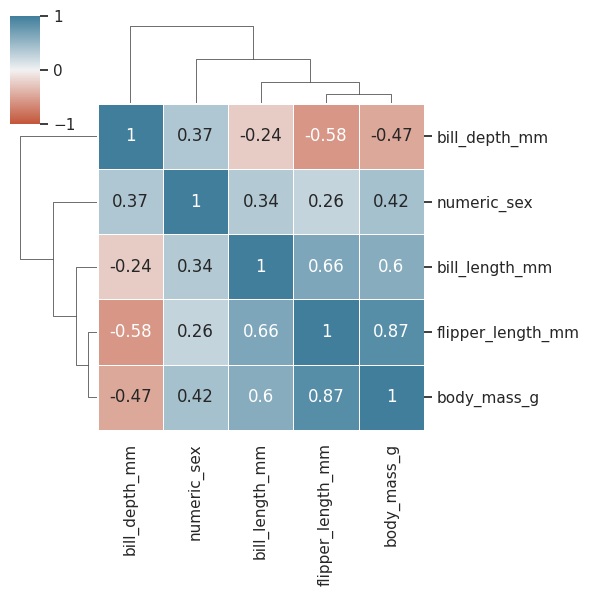

In [51]:
sns.clustermap(
    data=df.drop(["year"], axis=1).corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),        #nice color palette
    center=0,                                                 #centering the color legend
    vmin=-1,                                                  #set min corr value to -1
    vmax=1,                                                   #set max corr value to 1
    linewidths=0.5,
    annot=True,
    figsize=(6,6)
);

*Look like linear correlation is low among sex and the other variables*

## Multiple regression

I forgot the scale to weigh the penguins, **what is the best way to capture that data?**

Let's create many linear regression models and compare them

- *Use the df_clean, which contains the dataset without null values, just to avoid errors*

### Model 1

*let's create a model to predict the **"body_mass"** using the variable **"bill_depth"***

In [52]:
#Creating the model

model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
        data=df_clean
    )
    .fit()
)

#Describing the model

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.54e-32
Time:                        21:34:02   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2

*Now let's add a second variable **"bill_depth_mm"***

In [53]:
#Creating the model

model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm",
        data=df_clean
    )
    .fit()
)

#Describing the model

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           7.04e-46
Time:                        21:34:02   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3

*Now we can add the **"flipper_length_mm"** and see what happens*

In [54]:
#Creating the model

model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
        data=df_clean
    )
    .fit()
)

#Describing the model

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          9.26e-103
Time:                        21:34:02   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 4

In [55]:
#Creating the model

model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
        data=df_clean
    )
    .fit()
)

#Describing the model

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          6.28e-122
Time:                        21:34:02   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 5

*Let's now try with the "flipper_length_mm" alone*

In [56]:
#Creating the model

model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
        data=df_clean
    )
    .fit()
)

#Describing the model

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          3.53e-118
Time:                        21:34:02   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Note that only one variable explains the 76% of the variance.*

*You decide if sticking with one variable and getting 76% of variance, or stick with 4 and get 80%.*

## Multiple Regression Model Comparisons

### Creation of a results table

In [57]:
model_results = pd.DataFrame(
    dict(
        actual_value = df_clean.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species = df_clean.species,
        sex = df_clean.sex
    )
)

model_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


### Comparing predicted values vs Actual values (ECDFs)

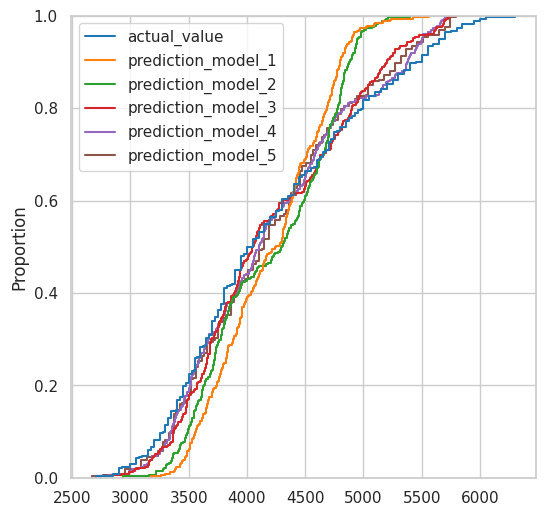

In [58]:
plt.figure(figsize=(6, 6))
sns.ecdfplot(
    data=model_results
);

*Now, note that the **BLUE LINE ARE THE ACTUAL VALUES***

*Therefore, the line that is closer to the model, would be the better model*

### Comparing predicted values distributions vs Original values distributions(Kdeplot)

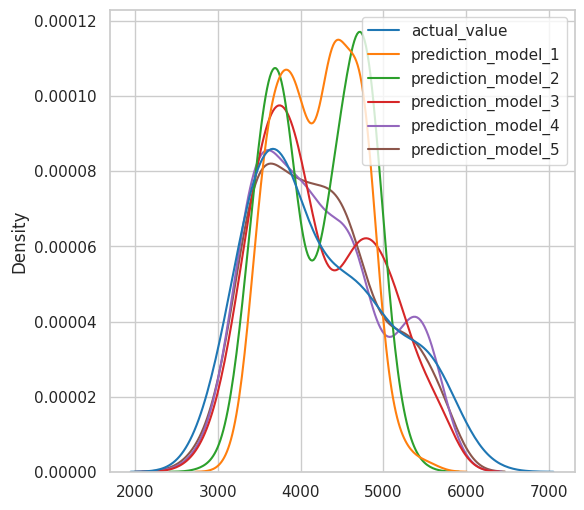

In [59]:
plt.figure(figsize=(6, 6))
sns.kdeplot(
    data=model_results
);

*Looks like the purple line (model 4) fits better, but that contains 4 variables.*

*The model 5 also fist really great with only two variables*

## Bonus: Pandas Profiling Report

In [60]:
import palmerpenguins
import pandas as pd
import pandas_profiling as pp

df = palmerpenguins.load_penguins()

pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=423db783-8258-448d-852a-21134de097ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>